In [1]:
import tensorflow as tf

In [2]:
import keras as K

Using TensorFlow backend.


In [3]:
K.backend

<module 'keras.backend' from '/Users/srinivas/anaconda3/lib/python3.7/site-packages/keras/backend/__init__.py'>

In [4]:
import os

In [5]:
import numpy as np

In [6]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from tensorflow import keras as kr

In [9]:
from tensorflow.keras.models import Sequential

In [10]:
from tensorflow.keras.layers import Conv2D

In [11]:
from tensorflow.keras.layers import MaxPooling2D

In [12]:
from tensorflow.keras.layers import Dense, Activation, Flatten

In [13]:
from tensorflow.keras.optimizers import Adam

In [14]:
train_data = pd.read_csv("../fashion/fashion-mnist_train.csv")
test_data = pd.read_csv("../fashion/fashion-mnist_test.csv")

In [15]:
train_data.iloc[[0]]

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
train_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
x_train = train_data.drop(["label"], axis=1)

In [18]:
y_train = train_data["label"]

In [19]:
y_train.iloc[[0]]

0    2
Name: label, dtype: int64

In [20]:
x_test = test_data.drop(["label"], axis=1)

In [21]:
y_test = test_data["label"]

In [22]:
#normalize data from 1 to 0
x_train = x_train.astype('float32')/255
y_train = y_train.astype('float32')
x_test = x_test.astype('float32')/255

In [23]:
type(x_train)

pandas.core.frame.DataFrame

In [24]:
x_train= x_train.to_numpy()

In [25]:
y_train = y_train.to_numpy()

In [26]:
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

In [27]:
#reshape train and test data 
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)


In [28]:
y_train = kr.utils.to_categorical(y_train, 10)

In [29]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

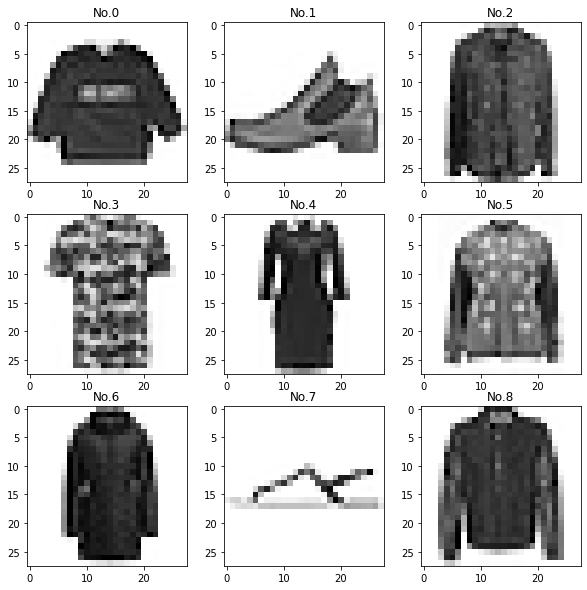

In [30]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.title("No." +str(i))
    plt.imshow(x_train[i].reshape(28,28), cmap ='Greys')

In [31]:
#build first model 
model = Sequential()
model.add(Conv2D(32,3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(Conv2D(32,3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 813,802
Trainable params: 813,802
Non-trainable params: 0
__________________________________________________

In [32]:
y_train.shape

(60000, 10)

In [33]:
#model fitting
result1=model.fit(x_train, y_train,batch_size=128, epochs=20)

Epoch 1/20
469/469 [==============================] - 140s 298ms/step - loss: 0.4421 - accuracy: 0.8435
Epoch 2/20
469/469 [==============================] - 152s 324ms/step - loss: 0.2786 - accuracy: 0.9008
Epoch 3/20
469/469 [==============================] - 113s 241ms/step - loss: 0.2267 - accuracy: 0.9186
Epoch 4/20
 63/469 [===>..........................] - ETA: 1:36 - loss: 0.1796 - accuracy: 0.9303

KeyboardInterrupt: 

In [ ]:
#build first model 
model = Sequential()
model.add(Conv2D(32,3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(Conv2D(32,3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

In [ ]:
#model fitting
result2=model.fit(x_train, y_train,batch_size=128, epochs=20)

In [ ]:
#Evaluate the model by using metrics
metrics = ['loss', 'accuracy']
plt.figure(figsize=(10,5))

for i in range(len(metrics)):
    metric = metrics[i]
    plt.subplot(1,2,i+1)
    
    plt.title(metric)
    plt_result1=result1.history[metric]
    plt_result2=result2.history[metric]
    
    #plot them all
    plt.plot(plt_result1, lable ='1st model')
    plt.plot(plt_result2, lable ='2nd model')
    plt.legend()
plt.show()